In [149]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
df = pd.read_csv("ss13hil.csv",usecols=['WGTP','MRGP','VEH','HHL','HINCP','TAXP','VALP'], skipinitialspace=True)
fig=plt.figure(figsize=[10,8], facecolor='white')
fig.suptitle('Sample Output',y=1.02,fontweight='bold')

Text(0.5, 1.02, 'Sample Output')

<Figure size 1000x800 with 0 Axes>

Text(0, 0.5, 'HHL')

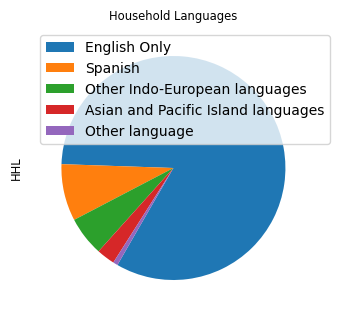

In [150]:
fig=plt.figure(figsize=[10,8])
ax1=fig.add_subplot(2,2,2)
y = df['HHL']
value_counts = y.value_counts()
mylabels=['English Only','Spanish','Other Indo-European languages','Asian and Pacific Island languages','Other language']
plt.pie(value_counts, explode=None, labels=None, colors=None, autopct=None, shadow=False,startangle=240)
plt.legend(mylabels,loc='upper left')
ax1.set_title('Household Languages',size='small')
ax1.set_ylabel('HHL',size='small')
#plt.show()


C:\Users\padka\AppData\Local\Temp\ipykernel_13120\682994378.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.6f}'.format(x) for x in h_vals],fontsize='small')


Text(0.5, 1.0, 'Distribution of household income')

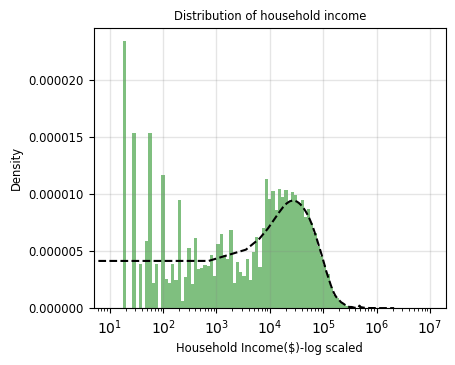

In [151]:
fig=plt.figure(figsize=[10,8])
ax2=fig.add_subplot(2,2,2)
x=df['HINCP']
df.loc[df.HINCP<1,'HINCP']=1
hicnp=x.fillna(1)

ax2.hist(hicnp,bins=np.logspace(1,7,num=100),alpha=0.5,density=True,range=(0,len(df['HINCP'])),color='green')
ax2.set_xscale('log')
h_vals=np.arange(0,0.000025,0.000005)
ax2.set_yticklabels(['{:,.6f}'.format(x) for x in h_vals],fontsize='small')
x.plot(kind='kde',color='black',ls='dashed')
ax2.grid(color='grey',linestyle='-',linewidth=1,alpha=0.2)
ax2.set_xlabel('Household Income($)-log scaled', size='small')
ax2.set_ylabel('Density', size='small')
ax2.set_title('Distribution of household income',size='small')
#plt.show()





Text(0.5, 1.0, 'Sum of vehicles in households')

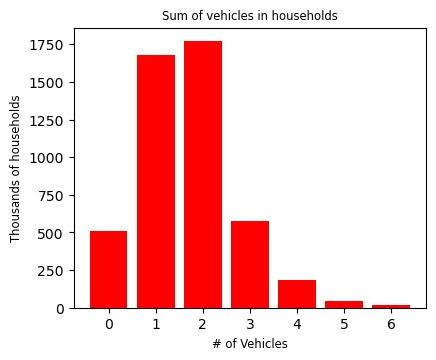

In [152]:

fig = plt.figure(figsize=(10, 8))

ax3 = fig.add_subplot(2, 2, 2)
df['VEH'].dropna().unique
df['WGTP'].dropna().value_counts()


grouped = df.groupby('VEH')['WGTP'].apply(list).reset_index()
#print(grouped)
grouped['Sum_WGTP'] = grouped['WGTP'].apply(lambda x: sum(x))
grouped['Sum_WGTP']=grouped['Sum_WGTP']/1000
plt.bar(grouped['VEH'],grouped['Sum_WGTP'],color='red')
ax3.set_xlabel('# of Vehicles', size='small')
ax3.set_ylabel('Thousands of households', size='small')
ax3.set_title('Sum of vehicles in households', size='small')

# Set the x-axis ticks to match the unique 'VEH' values





Text(0.5, 1.0, 'Property Tax vs Property values')

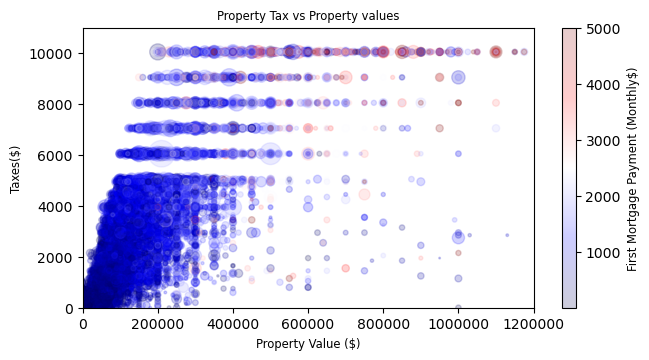

In [153]:

def get_taxp_mapping_dict():
    taxp_dict = {}
    taxp_dict[1] = np.NaN
    taxp_dict[2] = 1
    taxp_dict[63] = 5500
    counter = 50
    for key in range(3, 69):
        taxp_dict[key] = counter
        if key < 23:
            counter += 50
        elif 23 <= key < 63:
            counter += 100
        else:
            counter += 1000
    return taxp_dict

def convert_taxp(taxp_dict, taxp):
    # Convert the tax values using the mapping dictionary
    tax_amount = [taxp_dict.get(val, np.NaN) for val in taxp]
    return tax_amount

def draw_scatter(ax, df, valp, tax_amount):
    ax.set_ylim([0, 11000])
    ax.set_xlim([0, 1200000])
    
    # Assuming df['WGTP'] and df['MRGP'] exist in your DataFrame
    mappable = ax.scatter(valp, tax_amount, s=df['WGTP'] / 5, c=df['MRGP'], alpha=0.2, cmap='seismic', marker='o')
    cbar = plt.colorbar(mappable, ax=ax)
    cbar.set_label('First Mortgage Payment (Monthly$)', fontsize='small')

# Assuming you have your DataFrame 'df' loaded here
# df = pd.read_csv('your_data.csv')

taxp_dict = get_taxp_mapping_dict()
taxp = df['TAXP']  # Assuming 'TAXP' is a column in your DataFrame
tax_amount = convert_taxp(taxp_dict, taxp)
valp = df['VALP']  # Assuming 'VALP' is a column in your DataFrame

fig = plt.figure(figsize=[16, 8])
ax = fig.add_subplot(2, 2, 2)

plt.ticklabel_format(style='plain')
draw_scatter(ax, df, valp, tax_amount)
ax.set_xlabel('Property Value ($)', size='small')
ax.set_ylabel('Taxes($)', size='small')
ax.set_title('Property Tax vs Property values', size='small')

#plt.show()

In [156]:
plt.tight_layout()  # Ensure proper layout
plt.savefig('output.png', dpi=400,bbox_inches='tight')  # 'output.png' is the file name

<Figure size 640x480 with 0 Axes>